#Common Import Code

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

!pip install langdetect  # langdetect used to detect game title langauges

     |████████████████████████████████| 983kB 11.0MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.8-cp37-none-any.whl size=993193 sha256=57c74755ec3e074e6dacdd1894c23ddde369d6e29258613fcd65ac1c369abde9
  Stored in directory: /root/.cache/pip/wheels/8d/b3/aa/6d99de9f3841d7d3d40a60ea06e6d669e8e5012e6c8b947a57
Successfully built langdetect


In [ ]:
trainset = pd.read_csv('/content/drive/Shareddrives/CSCI 5523 - Data Mining Project Drive/Analysis/data/Video_games_esrb_rating.csv')
testset = pd.read_csv('/content/drive/Shareddrives/CSCI 5523 - Data Mining Project Drive/Analysis/data/test_esrb.csv')

#EDA

##Ishan's EDA

###Trainset Overview

In [ ]:
Counter(trainset[tarainset['no_descriptors']==1]['esrb_rating'])

NameError: ignored

In [ ]:
trainset.describe()

,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,intense_violence,language,lyrics,mature_humor,mild_blood,mild_cartoon_violence,mild_fantasy_violence,mild_language,mild_lyrics,mild_suggestive_themes,mild_violence,no_descriptors,nudity,partial_nudity,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence
count,1895.000000,1895.000000,1895.000000,1895.000000,1895.000000,1895.000000,1895.000000,1895.000000,1895.000000,1895.000000,1895.000000,1895.000000,1895.000000,1895.000000,1895.000000,1895.000000,1895.000000,1895.000000,1895.000000,1895.000000,1895.000000,1895.000000,1895.000000,1895.000000,1895.000000,1895.000000,1895.000000,1895.000000,1895.000000,1895.000000,1895.000000,1895.000000
mean,0.475462,0.050132,0.010026,0.227968,0.126121,0.019525,0.054354,0.034828,0.220580,0.118206,0.108179,0.033245,0.011609,0.069657,0.023747,0.048021,0.021636,0.077045,0.044327,0.047493,0.169921,0.014776,0.013193,0.034301,0.057520,0.067018,0.118206,0.035884,0.117678,0.015831,0.015831,0.063852
std,0.499529,0.218275,0.099655,0.419633,0.332074,0.138398,0.226774,0.183394,0.414748,0.322937,0.310689,0.179324,0.107148,0.254635,0.152299,0.213867,0.145530,0.266733,0.205875,0.212748,0.375662,0.120686,0.114129,0.182049,0.232895,0.250120,0.322937,0.186050,0.322312,0.124855,0.124855,0.244554
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
trainset.corr()

,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,intense_violence,language,lyrics,mature_humor,mild_blood,mild_cartoon_violence,mild_fantasy_violence,mild_language,mild_lyrics,mild_suggestive_themes,mild_violence,no_descriptors,nudity,partial_nudity,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence
console,1.000000,-0.010502,0.031460,-0.018638,0.074368,0.117672,0.060719,-0.002193,-0.149703,0.014717,-0.025412,0.000271,-0.053862,-0.057120,0.025013,-0.055683,0.010938,-0.005617,-0.030490,-0.028773,0.041926,0.014775,-0.017471,-0.034284,-0.035514,0.065992,0.063812,0.043566,-0.072237,-0.027630,0.031628,0.010672
alcohol_reference,-0.010502,1.000000,0.001153,-0.078723,-0.036286,0.054970,-0.001745,0.009118,-0.075557,0.148086,-0.025514,0.078798,0.110553,0.022633,0.122995,-0.040287,0.032322,0.006173,0.220757,0.096508,-0.039551,0.031995,-0.005368,-0.043297,-0.025596,-0.003547,-0.076622,0.007684,-0.001347,0.164599,-0.029137,-0.040217
animated_blood,0.031460,0.001153,1.000000,-0.054686,-0.038232,-0.014202,-0.000764,0.154219,-0.027989,0.094402,0.050214,-0.018662,-0.010907,0.034883,-0.015696,-0.022603,-0.014966,-0.029076,0.055530,-0.022472,-0.031429,-0.012324,-0.011636,-0.018967,-0.024862,-0.026972,-0.020440,-0.019415,-0.036753,0.072105,0.029670,0.017046
blood,-0.018638,-0.078723,-0.054686,1.000000,-0.206437,-0.067592,-0.080343,-0.041479,-0.173801,0.089358,0.033477,0.060607,0.117246,-0.128925,-0.068227,-0.116163,-0.080808,-0.006054,-0.000913,-0.079941,-0.185570,-0.024845,0.047414,0.084194,0.071050,0.105880,0.291957,-0.037207,0.090421,-0.038687,-0.018533,0.007284
blood_and_gore,0.074368,-0.036286,-0.038232,-0.206437,1.000000,-0.042122,-0.027978,0.118566,-0.171432,0.289246,0.097976,0.053680,-0.026334,-0.066487,-0.059250,-0.077890,-0.056494,-0.091879,-0.035481,-0.047463,-0.159186,0.124743,-0.002132,0.138011,0.124611,0.012603,0.220318,0.336910,-0.025282,-0.009979,0.053693,0.063320
cartoon_violence,0.117672,0.054970,-0.014202,-0.067592,-0.042122,1.000000,-0.017009,0.014797,-0.075072,-0.051667,-0.049149,0.037654,-0.015294,-0.038613,0.003040,-0.013856,-0.020985,0.002136,0.080791,0.022285,-0.053692,-0.017282,-0.016317,-0.026596,0.030661,-0.022569,-0.051667,-0.027225,0.007645,0.043213,0.012657,-0.036855
crude_humor,0.060719,-0.001745,-0.000764,-0.080343,-0.027978,-0.017009,1.000000,-0.045542,-0.077018,0.085252,-0.061018,0.033442,0.017475,-0.056458,0.100194,-0.021187,0.012343,-0.060539,0.084074,-0.031647,-0.065087,0.009223,0.013080,-0.032395,-0.029236,0.317392,-0.066149,0.016318,-0.029767,-0.011759,-0.030407,-0.005491
drug_reference,-0.002193,0.009118,0.154219,-0.041479,0.118566,0.014797,-0.045542,1.000000,-0.101056,0.019599,0.174765,0.045046,0.060019,0.140227,-0.010724,-0.029203,-0.028249,0.009876,0.015025,0.011711,-0.047628,0.024447,0.053712,0.027456,0.089050,0.064191,0.162238,0.071671,0.037812,-0.024093,-0.024093,-0.002522
fantasy_violence,-0.149703,-0.075557,-0.027989,-0.173801,-0.171432,-0.075072,-0.077018,-0.101056,1.000000,-0.167181,-0.000897,-0.034761,0.061154,0.234389,-0.066252,-0.113529,-0.079111,0.099248,0.033831,-0.011083,-0.223748,-0.012407,-0.050356,-0.044318,-0.038499,-0.040787,-0.072573,-0.054735,0.082195,0.003901,0.003901,-0.086881
intense_violence,0.014717,0.148086,0.094402,0.089358,0.289246,-0.051667,0.085252,0.019599,-0.167181,1.000000,-0.111730,0.068863,0.051871,-0.055239,0.093188,-0.074587,-0.054447,-0.105783,0.167331,0.010463,-0.122131,0.090633,-0.042334,0.002844,0.021872,0.006457,0.098834,0.386323,-0.006898,0.058322,0.005943,-0.008710


(array([416.,   0.,   0., 403.,   0.,   0., 387.,   0.,   0., 689.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

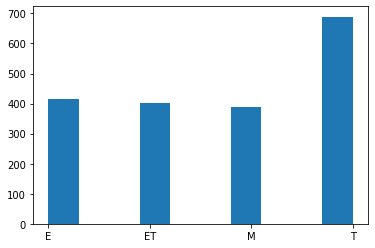

In [ ]:
ratings = trainset['esrb_rating'].tolist()
import matplotlib.pyplot as plt
plt.hist(ratings)

In [ ]:
len(trainset['esrb_rating'].tolist())

1895

In [ ]:
# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(trainset.iloc[:,1:33])
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

NameError: ignored

In [ ]:
# k means using 5 clusters and k-means++ initialization
kmeans = KMeans(n_jobs = -1, n_clusters = 5, init='k-means++')
kmeans.fit(trainset.iloc[:,1:33])
pred = kmeans.predict(trainset.iloc[:,1:33])

NameError: ignored

In [ ]:
from collections import Counter
Counter(pred)

In [ ]:
vars = trainset.iloc[:,1:33].columns.tolist()

In [ ]:
ts_ishan = trainset.copy()

In [ ]:
ts_ishan['cluster'] = kmeans.labels_

In [ ]:
import seaborn as sns
fig, ax = plt.subplots(6,5, figsize = (15,10))
for v, subplot in zip(vars, ax.flatten()):
  sns.boxplot(x='cluster', y=v, data=ts_ishan, ax=subplot)

###Resample

In [ ]:
trainset.shape

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
sm = RandomUnderSampler(random_state=77)
rs_x_train, rs_y_train = sm.fit_resample(trainset.iloc[:,:33], trainset['esrb_rating'])

In [ ]:
import matplotlib.pyplot as plt
plt.hist(rs_y_train)

In [ ]:
from collections import Counter
Counter(pd.DataFrame(rs_x_train)[0]).most_common()

##Anirudh's EDA

#### **Following EDA steps taken**:
- Distribution of 0/1s among attributes
- Number of Null and NaN values
- Jaccard based correlation (module to find top correlations from the matrix)

In [ ]:
# Temporary personal copy
AA_trainset = trainset.copy()
AA_testset = trainset.copy()

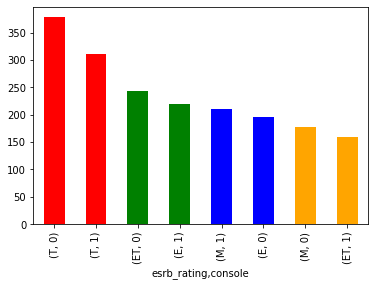

In [ ]:
AA_trainset[['esrb_rating','console']].value_counts().plot.bar(color=['red','red','green','green','blue','blue','orange','orange'])

In [ ]:
AA_trainset.head()

,title,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,intense_violence,language,lyrics,mature_humor,mild_blood,mild_cartoon_violence,mild_fantasy_violence,mild_language,mild_lyrics,mild_suggestive_themes,mild_violence,no_descriptors,nudity,partial_nudity,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating
0,Monster Jam Steel Titans 2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,E
1,Subnautica: Below Zero,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,ET
2,NIER REPLICANT VER.1.22474487139…,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,M
3,Jamestown+,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,ET
4,Neptunia Virtual Stars,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,T


In [ ]:
AA_trainset.shape

(1895, 34)

In [ ]:
AA_trainset.isnull().sum()

title                       0
console                     0
alcohol_reference           0
animated_blood              0
blood                       0
blood_and_gore              0
cartoon_violence            0
crude_humor                 0
drug_reference              0
fantasy_violence            0
intense_violence            0
language                    0
lyrics                      0
mature_humor                0
mild_blood                  0
mild_cartoon_violence       0
mild_fantasy_violence       0
mild_language               0
mild_lyrics                 0
mild_suggestive_themes      0
mild_violence               0
no_descriptors              0
nudity                      0
partial_nudity              0
sexual_content              0
sexual_themes               0
simulated_gambling          0
strong_janguage             0
strong_sexual_content       0
suggestive_themes           0
use_of_alcohol              0
use_of_drugs_and_alcohol    0
violence                    0
esrb_ratin

In [ ]:
AA_trainset.isna().sum()

title                       0
console                     0
alcohol_reference           0
animated_blood              0
blood                       0
blood_and_gore              0
cartoon_violence            0
crude_humor                 0
drug_reference              0
fantasy_violence            0
intense_violence            0
language                    0
lyrics                      0
mature_humor                0
mild_blood                  0
mild_cartoon_violence       0
mild_fantasy_violence       0
mild_language               0
mild_lyrics                 0
mild_suggestive_themes      0
mild_violence               0
no_descriptors              0
nudity                      0
partial_nudity              0
sexual_content              0
sexual_themes               0
simulated_gambling          0
strong_janguage             0
strong_sexual_content       0
suggestive_themes           0
use_of_alcohol              0
use_of_drugs_and_alcohol    0
violence                    0
esrb_ratin

In [ ]:
attr_distribution = AA_trainset.drop(['title','esrb_rating'], axis=1).apply(pd.Series.value_counts)
attr_distribution

,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,intense_violence,language,lyrics,mature_humor,mild_blood,mild_cartoon_violence,mild_fantasy_violence,mild_language,mild_lyrics,mild_suggestive_themes,mild_violence,no_descriptors,nudity,partial_nudity,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence
0,994,1800,1876,1463,1656,1858,1792,1829,1477,1671,1690,1832,1873,1763,1850,1804,1854,1749,1811,1805,1573,1867,1870,1830,1786,1768,1671,1827,1672,1865,1865,1774
1,901,95,19,432,239,37,103,66,418,224,205,63,22,132,45,91,41,146,84,90,322,28,25,65,109,127,224,68,223,30,30,121


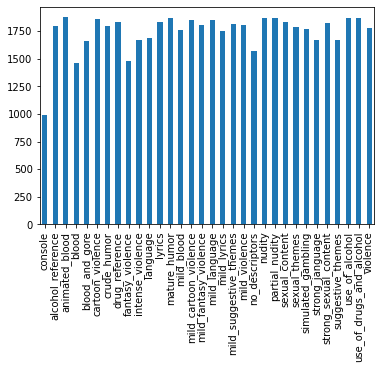

In [ ]:
# Count of 0/F in attributes
attr_distribution.T[0].plot.bar()

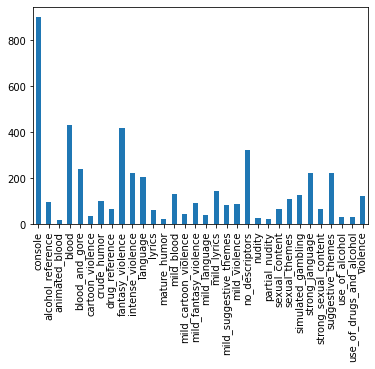

In [ ]:
# Count of 1/T in attributes
attr_distribution.T[1].plot.bar()

In [ ]:
# Get top N correlation pairs from correlation matrix
def topn_corr(corr_mat, N):
  num_of_bool_attr = 32
  s = corr_mat.unstack()
  so = s.sort_values(kind="quicksort")
  return so[-num_of_bool_attr - N : -num_of_bool_attr]

In [ ]:
# Jaccard metrics for correlation
from sklearn.metrics import jaccard_score
jacc_corr = AA_trainset.corr(jaccard_score)

# Top N correlations
topn_corr(jacc_corr, 8)

intense_violence       strong_sexual_content    0.216667
strong_sexual_content  intense_violence         0.216667
simulated_gambling     crude_humor              0.216931
crude_humor            simulated_gambling       0.216931
intense_violence       blood_and_gore           0.231383
blood_and_gore         intense_violence         0.231383
blood                  strong_janguage          0.237736
strong_janguage        blood                    0.237736
dtype: float64

### 2nd April
- Finding all sorts of correlation between attributes
  - Jaccard
  - Manhatten
  - Kendall
  - Pearson
  - Spearman
  - Accuracy
  - Cosine
- Finding correlation between different types of ESRB, and features
- Finding correlation between rows

In [ ]:
# Using manhatten distance for correlation
from sklearn.metrics.pairwise import manhattan_distances
manh_func = lambda a, b : manhattan_distances([a], [b]) / len(a)
manh_corr = AA_trainset.drop(['console'], axis=1).corr(manh_func)

# Top N correlations
topn_corr(manh_corr, 8)

fantasy_violence  blood_and_gore      0.338259
blood_and_gore    blood               0.354090
blood             blood_and_gore      0.354090
                  no_descriptors      0.378892
no_descriptors    blood               0.378892
fantasy_violence  no_descriptors      0.385224
no_descriptors    fantasy_violence    0.385224
blood             fantasy_violence    0.408443
dtype: float64

In [ ]:
# Using kendall 
kend_corr = AA_trainset.corr(method='kendall')

# Top N correlations
topn_corr(kend_corr, 8)

blood                  strong_janguage          0.291957
strong_janguage        blood                    0.291957
crude_humor            simulated_gambling       0.317392
simulated_gambling     crude_humor              0.317392
strong_sexual_content  blood_and_gore           0.336910
blood_and_gore         strong_sexual_content    0.336910
intense_violence       strong_sexual_content    0.386323
strong_sexual_content  intense_violence         0.386323
dtype: float64

In [ ]:
# Using pearson 
pear_corr = AA_trainset.corr(method='pearson')

# Top N correlations
topn_corr(pear_corr, 8)

blood                  strong_janguage          0.291957
strong_janguage        blood                    0.291957
crude_humor            simulated_gambling       0.317392
simulated_gambling     crude_humor              0.317392
strong_sexual_content  blood_and_gore           0.336910
blood_and_gore         strong_sexual_content    0.336910
intense_violence       strong_sexual_content    0.386323
strong_sexual_content  intense_violence         0.386323
dtype: float64

In [ ]:
# Using spearman
spear_corr = AA_trainset.corr(method='spearman')

# Top N correlations
topn_corr(spear_corr, 8)

blood                  strong_janguage          0.291957
strong_janguage        blood                    0.291957
crude_humor            simulated_gambling       0.317392
simulated_gambling     crude_humor              0.317392
strong_sexual_content  blood_and_gore           0.336910
blood_and_gore         strong_sexual_content    0.336910
intense_violence       strong_sexual_content    0.386323
strong_sexual_content  intense_violence         0.386323
dtype: float64

In [ ]:
# Using accuracy
from sklearn.metrics import accuracy_score
accr_corr = AA_trainset.corr(accuracy_score)

# Top N correlations
topn_corr(accr_corr, 8)

mature_humor    partial_nudity    0.976253
use_of_alcohol  animated_blood    0.976253
animated_blood  use_of_alcohol    0.976253
partial_nudity  mature_humor      0.976253
animated_blood  partial_nudity    0.976781
partial_nudity  animated_blood    0.976781
animated_blood  mature_humor      0.978364
mature_humor    animated_blood    0.978364
dtype: float64

In [ ]:
# Using Cosine similarity
from sklearn.metrics.pairwise import cosine_similarity
cos_func = lambda a, b : cosine_similarity([a], [b])
cos_corr = AA_trainset.corr(cos_func)

# Top N correlations
topn_corr(cos_corr, 8)

blood_and_gore         intense_violence         0.376007
intense_violence       blood_and_gore           0.376007
strong_sexual_content  blood_and_gore           0.376520
blood_and_gore         strong_sexual_content    0.376520
blood                  strong_janguage          0.405046
strong_janguage        blood                    0.405046
intense_violence       strong_sexual_content    0.421332
strong_sexual_content  intense_violence         0.421332
dtype: float64

#### ESRB Correlation with attributes

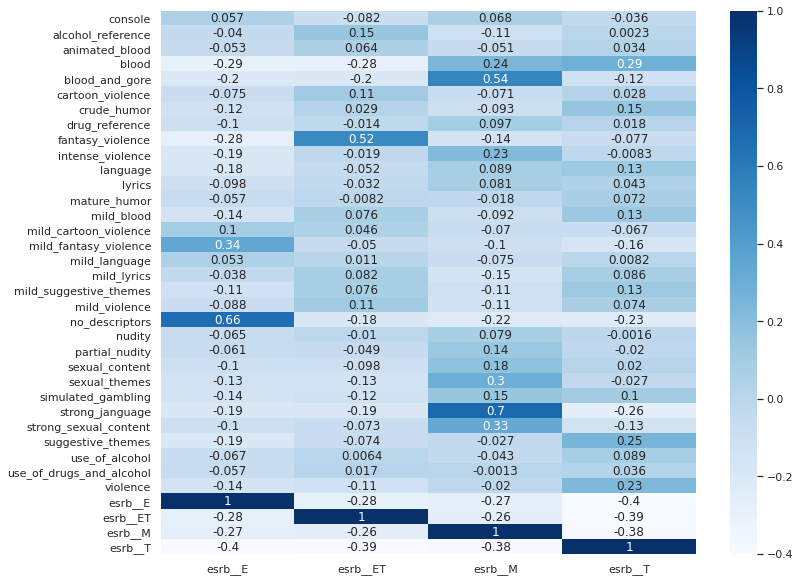

In [ ]:
import seaborn as sns

# Finding correlation with different values of ESRB
esrb_one_hot_df = pd.concat([AA_trainset, pd.get_dummies(AA_trainset['esrb_rating'], prefix='esrb_')], axis=1)

# now drop the original column (you don't need it anymore)
esrb_one_hot_df.drop(['esrb_rating'], axis=1, inplace=True)

# esrb column names
esrb_col_names = [x for x in esrb_one_hot_df.columns if 'esrb' in x]

# heatmap of correlations
sns.set(rc={'figure.figsize':(12,10)})
sns.heatmap(esrb_one_hot_df.corr()[esrb_col_names], annot = True, cmap = 'Blues')

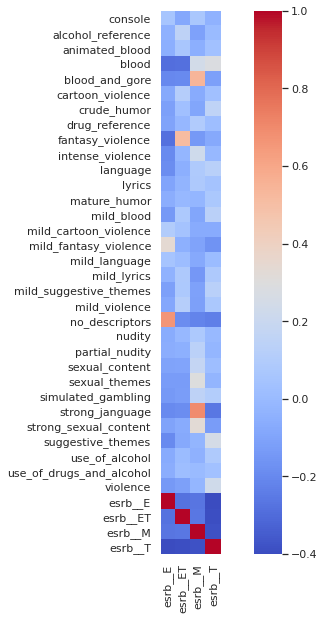

In [ ]:
# Sabrina's edit to clean up figure
sns.set(rc={'figure.figsize':(12,10)})
sns.heatmap(esrb_one_hot_df.corr()[esrb_col_names], annot = False, cmap = 'coolwarm', square = True)

#### Row-wise correlations

In [ ]:
# Not beneficial
AA_trainset[AA_trainset.drop('title',axis=1).duplicated()][:2]

,title,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,intense_violence,language,lyrics,mature_humor,mild_blood,mild_cartoon_violence,mild_fantasy_violence,mild_language,mild_lyrics,mild_suggestive_themes,mild_violence,no_descriptors,nudity,partial_nudity,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating
5,Monster Energy Supercross - The Official Video...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,E
27,Bus Simulator 21,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,E


## Anirudh's Training Models

In [ ]:
# remove insignificant features
columns_to_remove = ['title','console','esrb_rating']
AA_X_train = AA_trainset.loc[:, ~AA_trainset.columns.isin(columns_to_remove)]
AA_X_test = AA_testset.loc[:, ~AA_testset.columns.isin(columns_to_remove)]

In [ ]:
# Label encode training labels
from sklearn.preprocessing import LabelEncoder
label_encoder_inst = LabelEncoder()

AA_y_train = label_encoder_inst.fit_transform(AA_trainset['esrb_rating'])
AA_y_test = label_encoder_inst.transform(AA_testset['esrb_rating'])

In [ ]:
# Comparing multiple ML models
from sklearn import ensemble, linear_model, neighbors, naive_bayes, svm
from xgboost import XGBClassifier

MLA = [
    # Ensemble Methods
    ensemble.RandomForestClassifier(),
    
    # GLM
    linear_model.SGDClassifier(),
    svm.SVC(kernel='linear'),
    
    # Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    # Naive Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.MultinomialNB(),
    
    # SVM (Non-linear)
    svm.SVC(kernel='rbf'),
    
    # xgboost: http://xgboost.readthedocs.io/en/latest/model.html
    XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
    ]

In [ ]:
# creating table to compare Machine Learning Algorithms (MLA) metrics
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

def comp_ml_alg(X, y, cv=5):
    # Table to display results of Model comparisons
    MLA_columns = ['MLA Name', 'MLA Time','Train Accuracy Mean', 
                   'Train F1 Mean', 'Validation Accuracy Mean', 'Validation F1 Mean']
    MLA_compare = pd.DataFrame(columns = MLA_columns)

    # all metrics
    scoring = {'accuracy': make_scorer(accuracy_score),
               'f1_score' : make_scorer(f1_score, pos_label='positive', average='weighted'), 
               'precision': make_scorer(precision_score, pos_label='positive', average='weighted'),
               'recall': make_scorer(recall_score, pos_label='positive', average='weighted')}

    #index through MLA and save performance to table
    row_index = 0
    for alg in MLA:

        #set name and parameters
        MLA_name = alg.__class__.__name__
        
        # Specific renaming only for SVC
        if MLA_name == 'SVC':
          params = alg.get_params()
          if params['kernel'] == 'rbf':
            MLA_name = 'RBF_SVC'
          else:
            MLA_name = 'Linear_SVC'

        MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
        # MLA_compare.loc[row_index, 'MLA Parameters'] = str(alg.get_params())

        # Running cross-validation (Internal stratified folds created)
        cv_results = cross_validate(alg, X, y, cv=cv, scoring=scoring, return_train_score=True)

        MLA_compare.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
        # print (cv_results)
        MLA_compare.loc[row_index, 'Train Accuracy Mean'] = cv_results['train_accuracy'].mean()
        MLA_compare.loc[row_index, 'Train F1 Mean'] = cv_results['train_f1_score'].mean()
        MLA_compare.loc[row_index, 'Validation Accuracy Mean'] = cv_results['test_accuracy'].mean()
        MLA_compare.loc[row_index, 'Validation F1 Mean'] = cv_results['test_f1_score'].mean()    

        row_index+=1

    MLA_compare.sort_values(by = ['Validation F1 Mean'], ascending = False, inplace = True)
    return MLA_compare.reset_index(drop='True')

In [ ]:
# Running function to compare MLA algorithms
comp_ml_alg(AA_X_train, AA_y_train)

,MLA Name,MLA Time,Train Accuracy Mean,Train F1 Mean,Validation Accuracy Mean,Validation F1 Mean
0,RBF_SVC,0.0514606,0.908311,0.908297,0.870712,0.870286
1,RandomForestClassifier,0.205013,0.920053,0.920202,0.861741,0.861256
2,Linear_SVC,0.0346462,0.861214,0.860882,0.848549,0.847417
3,SGDClassifier,0.0226804,0.859367,0.859182,0.844855,0.843601
4,XGBClassifier,0.433163,0.855937,0.856845,0.831135,0.831123
5,BernoulliNB,0.0026947,0.843008,0.843993,0.829551,0.830383
6,MultinomialNB,0.00268965,0.835752,0.836919,0.826385,0.827449
7,KNeighborsClassifier,0.00704465,0.863193,0.862294,0.814776,0.812072


In [ ]:
# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=20)
AA_X_train_reduced = pca.fit_transform(AA_X_train)
AA_X_train_reduced.shape

(1895, 20)

In [ ]:
# Running function to compare MLA algorithms
comp_ml_alg(AA_X_train_reduced, AA_y_train)

,MLA Name,MLA Time,Train Accuracy Mean,Validation Accuracy Mean,Train F1 Mean,Validation F1 Mean
0,RandomForestClassifier,0.324991,0.920053,0.861741,0.920053,0.861741
1,XGBClassifier,0.597223,0.91438,0.855409,0.91438,0.855409
2,RBF_SVC,0.0564352,0.881398,0.847493,0.881398,0.847493
3,Linear_SVC,0.0370296,0.841293,0.830079,0.841293,0.830079
4,SGDClassifier,0.0188571,0.843272,0.829024,0.843272,0.829024
5,KNeighborsClassifier,0.00322566,0.868865,0.824274,0.868865,0.824274
6,BernoulliNB,0.00165195,0.710554,0.701847,0.710554,0.701847
7,MultinomialNB,0.000886774,NaN,NaN,NaN,NaN


### Tuning Random Forest Classifier parameters 

In [ ]:
from sklearn.model_selection import GridSearchCV
def hyperparam_selection(X, y, cv=5):
    rf_classifier = ensemble.RandomForestClassifier()

    # parameters to try for random forest classifier
    parameters = {'n_estimators': [10, 30, 50, 70, 100], 
                  'criterion': ['gini', 'entropy'], 
                  'max_depth': [5, 10, 15, None], 
                  'max_features': ['log2','auto','sqrt']}

    clf = GridSearchCV(rf_classifier, parameters, cv=cv, scoring='f1_weighted') 
    clf.fit(X, y)

    print ('*'*40)
    print("Best Score: ", clf.best_score_)
    print("Best Params: ", clf.best_params_)

In [ ]:
hyperparam_selection(AA_X_train, AA_y_train)

****************************************
Best Score:  0.8638704463912941
Best Params:  {'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 10}


## Test Accuracy

In [ ]:
from sklearn.metrics import classification_report

rf_classifier = ensemble.RandomForestClassifier(criterion='entropy', max_depth=None, max_features='sqrt', n_estimators=10)
rf_classifier.fit(AA_X_train, AA_y_train)
y_pred = rf_classifier.predict(AA_X_test)
print (classification_report(AA_y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       416
           1       0.84      0.91      0.87       403
           2       0.94      0.93      0.93       387
           3       0.92      0.87      0.89       689

    accuracy                           0.91      1895
   macro avg       0.91      0.92      0.92      1895
weighted avg       0.92      0.91      0.91      1895



##Sabrina's EDA

**EDA performed by Sabrina:**

*   Frequency of "True" vs "False" among all attributes
*   Frequency of "True" among every game
*   Average number of descriptors between ESRB ratings




In [ ]:
# Temporary personal copy
SJAset = trainset.copy()

In [ ]:
# Remove nominal columns for simplicity
SJAset_binary = SJAset.drop(['title', 'esrb_rating'], axis = 1)
# Frequencies 
freq = SJAset_binary.apply(pd.Series.value_counts)
freq.loc['total']= freq.sum(numeric_only=True, axis=0)
freq = freq.T
# Append to add percentages 
freq['0_perc'] = freq[0] / freq['total'] * 100
freq['1_perc'] = freq[1] / freq['total'] * 100
freq

,0,1,total,0_perc,1_perc
console,994,901,1895,52.453826,47.546174
alcohol_reference,1800,95,1895,94.986807,5.013193
animated_blood,1876,19,1895,98.997361,1.002639
blood,1463,432,1895,77.203166,22.796834
blood_and_gore,1656,239,1895,87.387863,12.612137
cartoon_violence,1858,37,1895,98.047493,1.952507
crude_humor,1792,103,1895,94.564644,5.435356
drug_reference,1829,66,1895,96.517150,3.482850
fantasy_violence,1477,418,1895,77.941953,22.058047
intense_violence,1671,224,1895,88.179420,11.820580


The majority of attributes have a "True" frequency <10%. None of these values are less than 1%.

Now let's look at the frequency of "True" among all the games. This first cell defines the cutoff as a percentage.

In [ ]:
# Total number of binary columns
total_cols=len(SJAset_binary.axes[1]) -1 #Subtract one to account for console attribute
# Set threshold for number of present attribtes
thresh_perc = 0.05    #5% cutoff
# Determine value cutoff
thresh = thresh_perc * total_cols
print('Threshold for number of attributes present =',thresh)

Threshold for number of attributes present = 1.55


Here is the distribution of present attribte number among all of the games:

Text(0, 0.5, 'Number of games')

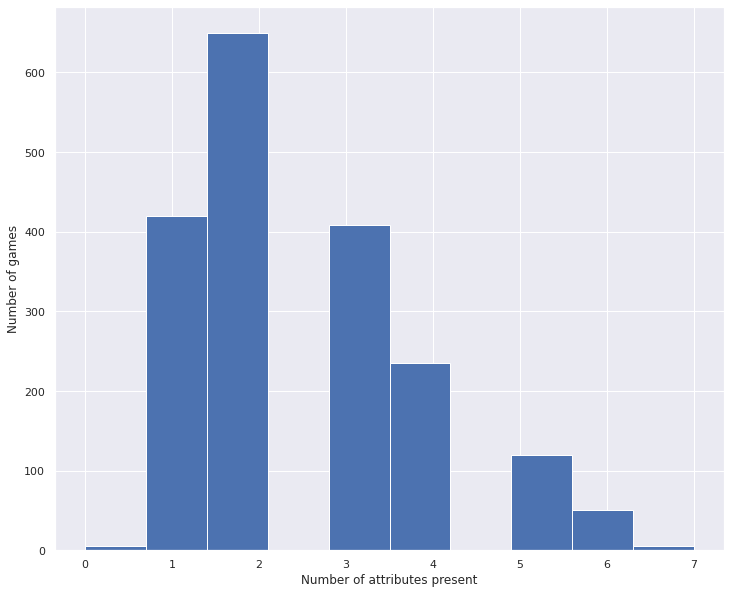

In [ ]:
SJAset_games = SJAset.set_index('title')
# Distribution of row means (number of attributes present)
rowmeans = SJAset_games.sum(axis=1)
plt.hist(rowmeans)
plt.xlabel('Number of attributes present')
plt.ylabel('Number of games')

Next, let's see how many games will meet our defined threshold for present attribute values.

In [ ]:
# Subset games that meet threshold
SJAset_games_thresh = SJAset_games[SJAset_games.sum(axis=1) >= thresh]
# Return number of games (rows) that have >= attribute threshold
print('% threshold =', thresh_perc)
print('% of games that meet threshold =',len(SJAset_games_thresh)/len(SJAset_games))
print('Number of games that meet threshold =',len(SJAset_games_thresh))
print('Number of games total =',len(SJAset_games))

% threshold = 0.05
% of games that meet threshold = 0.775197889182058
Number of games that meet threshold = 1469
Number of games total = 1895


How does the distribution of ESRB rating change when we subset the games that meet the attribute threshold?

In [ ]:
# Extract ratings
rate = SJAset_games['esrb_rating'].tolist()
rate_filt = SJAset_games_thresh['esrb_rating'].tolist()
# Peek at frequencies
from collections import Counter
rate_count = Counter(rate)
rate_filt_count = Counter(rate_filt)
print('original dataset',[(i, rate_count[i] / len(rate)) for i in rate_count])
print('filtered dataset',[(i, rate_filt_count[i] / len(rate)) for i in rate_filt_count])

original dataset [('E', 0.21952506596306068), ('ET', 0.21266490765171503), ('M', 0.20422163588390502), ('T', 0.36358839050131925)]
filtered dataset [('E', 0.12137203166226913), ('ET', 0.15197889182058047), ('M', 0.19155672823218997), ('T', 0.31029023746701845)]


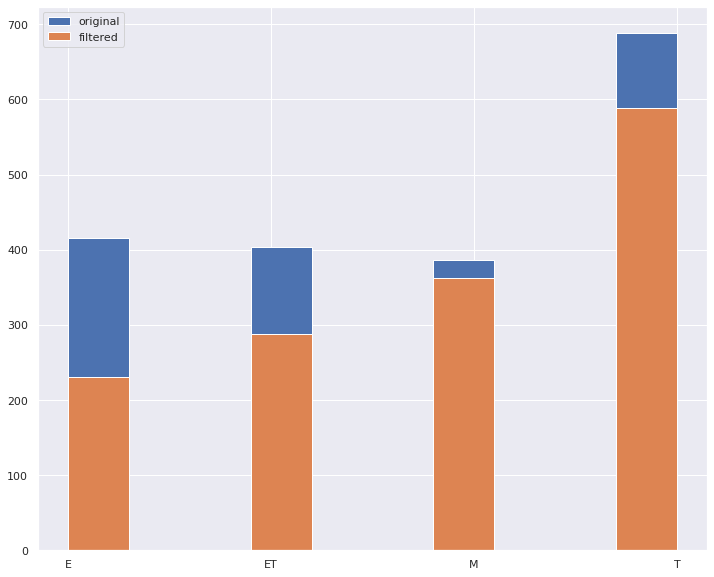

In [ ]:
# Plot as stacked barchart
import matplotlib.pyplot as plt
plt.hist(rate, label="original")
plt.hist(rate_filt, label="filtered")
plt.legend(loc="upper left")

The distribution has changed significantly after filtering, and biases exclusion of E/ET-rated games. In fact, row sum alone may be a pretty good indicator of ESRB rating.

In [ ]:
## Average number of descriptors per rating
# Add number of attributes as a new column
SJAset_games = SJAset.set_index('title')
SJAset_games['n_attributes'] = SJAset_games.sum(axis=1)
# Distribution of row means (number of attributes present)
SJAset_games.groupby('esrb_rating')['n_attributes'].describe()

,count,mean,std,min,25%,50%,75%,max
esrb_rating,,,,,,,,
E,416.0,1.555288,0.556946,0.0,1.0,2.0,2.0,3.0
ET,403.0,2.200993,1.082102,1.0,1.0,2.0,3.0,6.0
M,387.0,3.583979,1.360072,1.0,3.0,4.0,5.0,7.0
T,689.0,2.763425,1.222630,1.0,2.0,3.0,3.0,7.0


Interesting: the maximum number of descriptors for E is no bigger than 3. ET,M and T all have 6 or greater. As predicted, "M" has the greatest average number of descriptors (3.6) followed by T (2.8), ET (2.2) and E(1.6). It will be interesting to see how our model parses apart ET and T. E has the lowest spread (sd) overall, which makes sense. M has one of the greatest spreads.

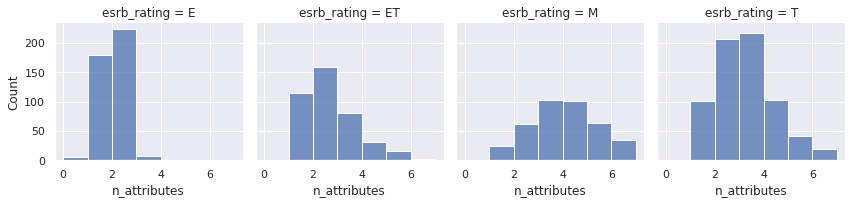

In [ ]:
import seaborn as sns
sns.displot(
    SJAset_games, x="n_attributes", col="esrb_rating",
    binwidth=1, height=3, facet_kws=dict(margin_titles=True),
)

Although these histograms mostly recapitulate what's seen in the descriptive statistics, we can see that there are tails on the right sides of ET and T, meaning that a small portion of the games contain a larger number of attributes. This could be ammunition for our disucssion of the subjectivity of ratings.

##Justin's EDA

In [ ]:
import os                                 # import the os module

myOGSet = testset.copy()                 # make a copy of hte training set dataframe

# Change the current working directory to the data directory in the shared drive.
os.chdir('/content/drive/Shareddrives/CSCI 5523 - Data Mining Project Drive/Analysis/data')

# Adding new columns to the dataframe.
#  slug
#   'slug' is the new column for the part of a URL (Uniform Resource Locator)
#    that is quasi-human readable that is put after all the domain redirection.
#    You see this easily on news sites, most have slugs like www.news.com/this-is-the-slug
myOGSet['slug'] = None

#  released
#   'released' is the new column for the release date of the video game.
myOGSet['released'] = ''

myOGSet['manual_update'] = False

#  base_game
#   'base_game' is the new column for if this is a base game or if the game
#   is DLC or a special edition.
myOGSet['base_game'] = True

#  apostrophe_in_title
#   'apostrophe_in_title' is the new column for if an apostrophe >> ' << exists
#   in the game title. This column doesn't provide any new information and should
#   be dropped prior to any models being built on the dataset. This column is
#   used purely to keep track of this information for analysis if needed.
myOGSet['apostrophe_in_title'] = False

#   has_dup
#    'has_dup' is the new column for if this game has a duplicate in the dataset.
#    Duplicate determination is based off of the final santized slug, not the
#    game title itself. If this column is 'True' in the final dataset then
#    there >> was << a duplicate, but it has either been deleted or the duplication
#    reason fixed.
myOGSet['has_dup'] = False

#   drop
#    'drop' is the new column for if this game title should be dropped. If during
#    sanitization a game title is determined to need to be dropped, this column
#    will be 'True' and later dropped based on this columns value. This column is
#    used purely to keep track of this information for analysis if needed.
myOGSet['drop'] = False

myOGSet

In [ ]:
myOGSet.shape # output shape of the dataset

In [ ]:
import re       # regex

# Regex for the following special symbols.
#   Trademark Unicode Code Point: U+2122 
#   Copyright Unicdoe Code Point: U+00A9 
#   Registered Unicode Code Point: U+00AE
#   Ampersand Unicode Code Point: U+0026 
#   – (hypen) - for some reason the hypen in some game titles is no in ASCII range.
#   … (ellipse) - for some reason actual ellipses are used instead of three dots.
#   ´ (forward tick) - for some reason a forward ticks are used instead of an apostrophe.
tmCrRAmpSymbol = re.compile('[\u2122\u00A9\u00AE\u0026\–\…\´]')

# Regex for ASCII (American Standard Code for Information Interchange) characters.
# We are doing to do our own regex for ASCII characters instead of calling the 
# string function .isascii() because we want to find the characters that are 
# not ASCII so we can do extra analysis.
# ASCII characters are 7-bit characters from hex 0x00 to hex 0x7F.
nonASCIIChars = re.compile('[^\x00-\x7F]')

# Make a copy of the dataframe. You should NEVER iterate over anything while
# also making changes to it.
interimDF = myOGSet.copy()
for row in myOGSet.itertuples():  # iterate over each game title in the dataframe
  gameTitle = row.title           # get the game title
  gameTitleURL = ''               # set the URL we will use to empty string ''

  # Search the the game title for an apostrophe >> ' <<, this is useful for later
  # if we need to do sanitization on the game title.
  interimDF.loc[row.Index, 'apostrophe_in_title'] = (gameTitle.find('\'') > -1)

  # Run the regex to find non-ASCII characters in the game title.
  resultsMatch = nonASCIIChars.search(gameTitle)

  # Check if we got a match from the regex. If we did, this evaluates to 'True'.
  if resultsMatch:

      # Substitute out any special symbols like the trademark symbol with '-'.
      gameTitlNoSpecialSymbols = re.sub(tmCrRAmpSymbol, '-', gameTitle)

      # Rerun the regex to find non-ASCII characters in the game title.
      resultsMatch = nonASCIIChars.search(gameTitlNoSpecialSymbols)

      # Check if we got a match from the regex. If we did, this evaluates to 'True'.
      if resultsMatch:
        # We got a result again with the non-ASCII regex. This game is likely to
        # be a non-English game title. 

        # Get the position of the non-ASCII character that the regex found.
        charPos = resultsMatch.start()

        # Get the character in the sanitized game title that is non-ASCII.
        charFound = gameTitlNoSpecialSymbols[charPos]

        # Print that we will be dropping this game from the dataset.
        print(f'{gameTitle} is being dropped as a non-English video game; found char {charFound} at pos {charPos}')

        # Do the actual drop from the dataset.
        interimDF.loc[row.Index, 'drop'] = True
      else:
        # The second attempt to find non-ASCII characters returned none.
        # That means that only the special symbols were in the game title.

        # Convert ASCII game title to lowercase, replace all non-alphanumeric chars with a hypen '-'
        gameTitleURL = re.sub('[^0-9a-zA-Z]+', '-', gameTitle.lower())
  else:
    # We didn't get a match from the initial non-ASCII character regex.
    # The game title contains only ASCII characters to get here.

    # Convert ASCII game title to lowercase, replace all non-alphanumeric chars with a hypen '-'
    gameTitleURL = re.sub('[^0-9a-zA-Z]+', '-', gameTitle.lower())

  # Check if the game title ends with a hypen '-'.
  if gameTitleURL.endswith('-'):
    # The game title ends with a hypen, remove it annd update the row entry.
    interimDF.loc[row.Index, 'slug'] = gameTitleURL[:-1]
  else:
    # The game title doesn't end with a hypen, update the row entry.
    interimDF.loc[row.Index, 'slug'] = gameTitleURL

interimDF # output dataframe

In [ ]:
interimDF.shape # output shape of the dataset

In [ ]:
interimDF = interimDF[interimDF['drop'] == False]  # Any game titles that need to be dropped, do it now.
interimDF.shape                                    # output shape of the dataset

In [ ]:
import requests  # import requests module

# This variable is only used to enabled/disable querying the database. This
# is in the event anyone clicks 'Run all' under the 'Runtime' tab. We don't 
# want this cell always querying the database.
queryDB = False

# Base URL of the API to call to get game title information.
baseURL = 'https://api.rawg.io/api/games/'

# Regex for a hypen '-' followed by any numer of nuermical of digits.
# e.g. -123445 or -1 
slugNumEnd = re.compile('-[0-9]+$')

# Regex for a single character between two hypens '-'.
# e.g. -a-
slugSingleChar = re.compile('-[a-z]-')

# Again make a copy of the dataframe since we will be changing it and iterating
# over it at the same time.
updatedDF = interimDF.copy()

if queryDB:
  printFile = open('./AlgRunOutput/pyDBQueryOutput.txt', mode='wt', buffering=1)

# JN - (1) a game with a single character letter or number isn't valid.
#      (2) remove numbers at the beginning of game titles.

# Function Name    : updateReleaseDate
#
# Function Purpose : Update the 'released' column in the dataframe and possibly
#                    the slug.
#
# Parameters       : 
#   gameInfo   - the JSON response from the server.
#
#   slug       - the slug for this game.
#
#   updateSlug - Update the slug in the dataframe along with the released date.
#
# Returns          : None
def updateReleaseDate(gameInfo, slug, updateSlug):
  # Get the release date, if redirection, and redirected slug form the JSON
  # game information.
  releaseDate, wasRedirected, redirectSlug = getGameRelease(gameInfo)

  if wasRedirected:  # The game title was redirected.
    # Output that the game title was redirected and to where.
    print("      ", baseURL + slug, "redirected to", baseURL + redirectSlug, file=printFile)

    # Check if the release date is None (Python's version of null) or an empty string.
    if releaseDate == None or releaseDate == "":
      # The game title released date isn't valid; update the game title to be dropped.
      print("      ", baseURL + slug, "release date is empty; dropping game title", file=printFile)
      updatedDF.loc[row.Index, 'drop'] = True
    else:
      # The game title released date is valid; update the released column for this game title.
      print("      ", baseURL + slug, "released on", releaseDate, file=printFile)
      updatedDF.loc[row.Index, 'released'] = releaseDate

    if updateSlug:  # Our caller wants to update the slug.
      # Update the 'slug' column for this row.
      print("      ", slug, "updated to", redirectSlug, file=printFile)
      updatedDF.loc[row.Index, 'slug'] = redirectSlug
  else:
    # The game title didn't redirect to get here.
    # Output the game title.
    print("      ", baseURL + slug, "exists", file=printFile)
    
    # Check if the release date is None (Python's version of null) or an empty string.
    if releaseDate == None or releaseDate == "":
      # The game title released date isn't valid; update the game title to be dropped.
      print("      ", baseURL + slug, "release date is empty; dropping game title", file=printFile)
      updatedDF.loc[row.Index, 'drop'] = True
    else:
      # The game title released date is valid; update the released column for this game title.
      print("      ", baseURL + slug, "released on", releaseDate, file=printFile)
      updatedDF.loc[row.Index, 'released'] = releaseDate

    if updateSlug: # Our caller wants to update the slug.
      # Update the 'slug' column for this row.
      updatedDF.loc[row.Index, 'slug'] = slug

# Function Name    : getGameRelease
#
# Function Purpose : Get the game title's released date from the JSON information.
#
# Parameters       : 
#   jsonGameInfo   - the JSON response from the server.
#
# Returns          : 
#  wasRedirected   -  the slug used to query this game was redirected to another
#                     game title.
#
#  redirectSlug    - the redirected slug. If 'wasRedirected' is False, this value
#                    will be the empty string ''.
#
#  released        - the released date of game title. If 'wasRedirected' is True,
#                    this is the released date of the redirected to game title.
def getGameRelease(jsonGameInfo):
  wasRedirected = False  # Request for game title redirect to another page.
  redirectSlug  = ''     # Redirected game title (if occurred).
  released      = ''     # Released date for game title.

  try:
    # Try to get the 'released' dictionary entry from the JSON response.
    released = jsonGameInfo['released']
  except KeyError:
    # The 'released' dictionary entry doesn't exist.

    # Try to get the 'redirect' dictionary entry from the JSON response.
    isRedirect = jsonGameInfo['redirect']
    if isRedirect: # This game was redirected.

      # Get the slug that this game title redirects to.
      redirectSlug = jsonGameInfo['slug']
      
      # Make another request to the API to get the redirect to game title's
      # information.
      resp = requests.get(baseURL + redirectSlug)
      
      # Update that the supplied title arguement got redirected.
      wasRedirected = True

      # Get the 'released' dictionary entry from the JSON response.
      released = resp.json()['released']
  # Return the information to our caller.
  return released, wasRedirected, redirectSlug

if queryDB: # only run this code if explicitly told to
  for row in interimDF.itertuples(): # iterate over the rows in the dataset
    # Check if the released date has been populated already, if so we don't need
    # to do it again.
    if row.released == '':
      print("Year_of_Release is empty for", row.title, "| Checking for the existence of", baseURL + row.slug, file=printFile)
      
      # Make the request to the API to get the game title's information.
      resp = requests.get(baseURL + row.slug)
      
      # Check if the HTTP response code is a success (200)
      if resp.status_code == 200:
        # A successful response was returned with the slug we used.
        updateReleaseDate(resp.json(), row.slug, False)
      else:
        # The request wasn't successful with the slug we used.
        rowSlug = row.slug

        # Search the slug to see if the slug ends with a digit.
        resultMatch = slugNumEnd.search(rowSlug)

        # Loop while the slug ends with a digit.
        while resultMatch:
          # The slug ends with a digit in the form of [slug]-#, convert to [slug]#

          # Split the slug on the last hypen from the end.
          splitSlug = rowSlug.rsplit('-', 1)

          # Now recombine the slug without the hypen '-' digit at the end.
          updatedSlug = ''.join(splitSlug)
          print("   Checking for existence of", baseURL + updatedSlug, file=printFile)

          # Make the request to the API again to check if our updated slug
          # matches a game title.
          resp = requests.get(baseURL + updatedSlug)

          # Check if the HTTP response code is a success (200)
          if resp.status_code == 200:
            # A successful response was returned with the updated slug.
            updateReleaseDate(resp.json(), updatedSlug, True)
            break
          else:
            # The wasn't successful with the updated slug we used.
            print('   HTTP Header Response Code:', resp.status_code, file=printFile)

            # Search the slug to see if the slug ends with another digits.
            resultMatch = slugNumEnd.search(updatedSlug)
            rowSlug = updatedSlug
        # end while

        # If above while loop ended without a successful request, the regex 
        # match object will equaivate to False.
        if not resultMatch:
          print(f"   Checking for apostrophe in {row.title}", file=printFile)

          # Check if prior checks found an apostrophe in the game title.
          if row.apostrophe_in_title == True:
            # An apostrophe was found in the game title, that means when we 
            # converted the apostrophe >> ' << to hypens '-' we likely left a
            # single character stranded in the slug.
            print(f"   Apostrophe found in {row.title}; checking if we can condense slug", file=printFile)

            # Search for the single character in the slug.
            resultMatch = slugSingleChar.search(rowSlug)

            # Check if the results object found the single character in the slug.
            if resultMatch:
              # We found a single character in the name, we will now combine it
              # with the prior word.

              # Find the character position in the slug that the results match
              # object found.
              charPos = resultMatch.start()

              # Get the single character in the string.
              charFound = rowSlug[charPos + 1]
              print(f'   Found {charFound} at pos {charPos + 1} in {rowSlug}, condensing', file=printFile)

              # Split the slug into pre-single character and post-single character.
              # This will cut out the hypen '-' that split the single character
              # from the previous word in the slug.
              preCharSlug = rowSlug[:charPos]
              postCharSlug = rowSlug[charPos + 1:]
              print("   PreCharSlug: ", preCharSlug, "\n   PostCharSlug", postCharSlug, file=printFile)
              
              # Recombine the pre-single character slug and post single character slug.
              rowSlug = preCharSlug + postCharSlug
              print("   New slug: ", rowSlug, file=printFile)
              print("   Checking for existence of", baseURL + rowSlug, file=printFile)

              # Make the request to the API again to check if our updated slug
              # matches a game title.
              resp = requests.get(baseURL + rowSlug)

              # Check if the HTTP response code is a success (200)
              if resp.status_code == 200:
                # A successful response was returned with the updated slug.
                updateReleaseDate(resp.json(), rowSlug, True)
              else:
                # The request wasn't successful, set the result match object to None.
                # JN TO DO: This should technically be a loop.
                resultMatch = None
          else:
            # Apostrophe was not found in the game title.
            print(f"   Apostrophe not found in {row.title}", file=printFile)

        # If above apostrophe ended without a successful request, the regex 
        # match object will equaivate to False.
        if not resultMatch:
          print("   Checking if this is DLC or a special edition of the game", file=printFile)
          
          updatedSlug = rowSlug
          # The beginning of hte game title begins with a digit.
          print(f'{rowSlug} begins with a digit; removing digit {rowSlug[0]}', file=printFile)

          # Loop while the beggining of the game title begisn with a digit.
          while updatedSlug[0].isdigit():
            print(f'{updatedSlug} begins with a digit; removing digit {updatedSlug[0]}', file=printFile)
            
            # Strip the digit off the beginning of the game titile.
            updatedSlug = updatedSlug[1:]

          # JN TO DO: Add a request to the API after stripping away front
          #           digits.
          
          # The final sanitization we can do is to remove sequences starting
          # from the end and slowly chip away until either we have nothing left
          # or we find a match. If we find a match then this game was likely
          # DLC or a special edition (e.g. The Sims 4 Nifty Knitting).

          # Get the last hypen '-' in the slug.
          hyphenPos = rowSlug.rfind('-')

          # Loop while there is a hyphen '-' found in the slug AND the slug
          # we are checking has above two words.
          while (hyphenPos > -1) and (len(updatedSlug.split('-')) > 2):
            # Strip away the last word and hyphen '-'.
            updatedSlug = updatedSlug[:hyphenPos]
            print("   Checking for existence of", baseURL + updatedSlug, file=printFile)

            # Make the request to the API to check if our updated slug matches a
            # game title.
            resp = requests.get(baseURL + updatedSlug)

            # Check if the HTTP response code is a success (200)
            if resp.status_code == 200:
              # A successful response was returned with the updated slug.
              print(f'   {row.title} is DLC or special edition', file=printFile)
              updatedDF.loc[row.Index, 'base_game'] = False
              updateReleaseDate(resp.json(), updatedSlug, True)
              break
            else:
              # The request wasn't successful, find the next hypen '-' in the 
              # slug from the end.
              hyphenPos = updatedSlug.rfind('-')
          
          # We exhausted all the hypens in the slug, this is an error condition.
          if (hyphenPos == -1):
            print(f"!!ERROR 01!! Sanitization effors failed on {rowSlug}; removing game title...", file=printFile)
          # The slug is two words of less, this is an error condition.
          elif len(updatedSlug.split('-')) <= 2:
            print(f"!!ERROR 02!! Sanitization effors failed on {rowSlug}; removing game title...", file=printFile)

  printFile.flush()  # flush the output to the file
  printFile.close()  # close the file descriptor

In [ ]:
qInterimDF = updatedDF[updatedDF['drop'] == False] # Any game titles that need to be dropped, do it now.
print(qInterimDF.shape)                            # output shape of the dataset
print(updatedDF.shape)                             # output shape of the dataset
qInterimDF                                         # dump a quick look at the dataset

In [ ]:
# Check the dataset for duplicates based on the slug column.
# .duplicated returns a Series of boolean values, passing this into the dataset
# will return all the duplicate rows.
dupGameTitles = qInterimDF[qInterimDF.duplicated(subset='slug', keep=False)]

# Make a copy of the dataset because we are about the iterate over it and update
# it.
dropDupDF = qInterimDF.copy()

# For each row in the duplicate dataset, set the corresponding row in the copied
# dataset that is has a duplicate entry.
for row in dupGameTitles.itertuples():
  dropDupDF.loc[row.Index, 'has_dup'] = True

dropDupDF                     # dump a quick look at the dataset

In [ ]:
if queryDB:
  # If we actually ran the DB query, dump the dataset to CSV files.

  # 'dropDupDF' has updated 'has_dup' column and dropped columns that needed to be dropped.
  # 'updateDF' is a precursor dataset of 'dropDupDF' that doesn't have all the updates.
  #updatedDF.to_csv('updated_game_titles.csv')
  dropDupDF.to_csv('./AlgRunOutput/updated_game_titles2.csv')